## Imports

In [1]:
import SimpleITK as sitk
from lungmask import mask
import nibabel as nib
from utils import read_nifti_file, register_images, register_test_images, get_landmark, calculate_tre_mean_std, multi_parameter_list, save_as_nifti, convert_txt_to_pts_with_header, visualize_histograms

## Image Conversion (Raw to Nifti)

In [ ]:
## Done with ITK-SNAP

## Initial Validation

In [2]:
# check if the landmarks are correct for each patient
for patient_num in range(1, 5):
    inhale_landmarks = get_landmark(patient_num=patient_num, phase='i')
    exhale_landmarks = get_landmark(patient_num=patient_num, phase='e')

    # calculate the TRE
    tre_mean, tre_std = calculate_tre_mean_std(inhale_landmarks, exhale_landmarks)
    print(f'Patient {patient_num} TRE mean: {tre_mean} mm, std: {tre_std} mm')
    

Patient 1 TRE mean: 26.14727660137311 mm, std: 11.337752042730125 mm
Patient 2 TRE mean: 21.640839694139274 mm, std: 6.415267547626306 mm
Patient 3 TRE mean: 12.62588335216309 mm, std: 6.381867428751379 mm
Patient 4 TRE mean: 29.583559738904107 mm, std: 12.92417092574431 mm


In [3]:
for patient_num in range(1, 5):
    for phase in ['i', 'e']:       
        convert_txt_to_pts_with_header(f"data/copd{patient_num}/copd{patient_num}_300_{phase}BH_xyz_r1.txt")

In [3]:
exhale_images = []
inhale_images = []
for patient_num in range(1, 5):
    inhale_images.append(nib.load(f'data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz').get_fdata())
    exhale_images.append(nib.load(f'data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz').get_fdata())

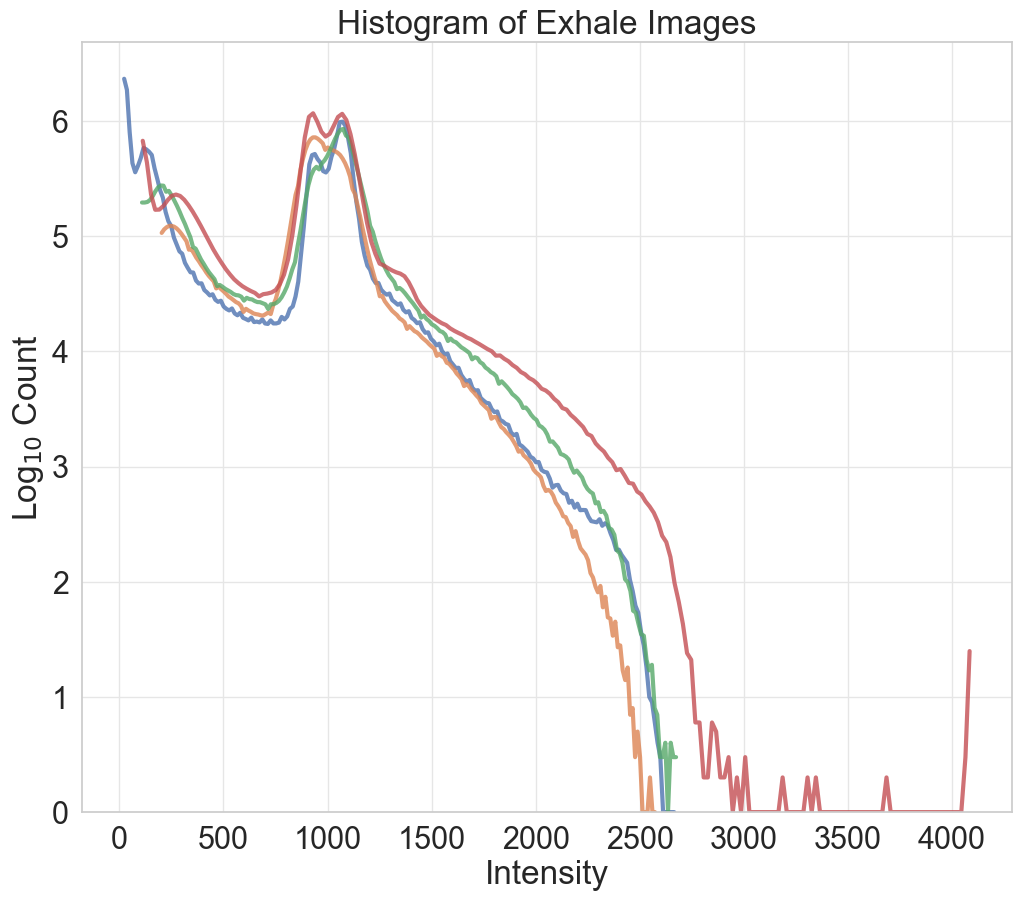

In [4]:
visualize_histograms(exhale_images, title="Histogram of Exhale Images")

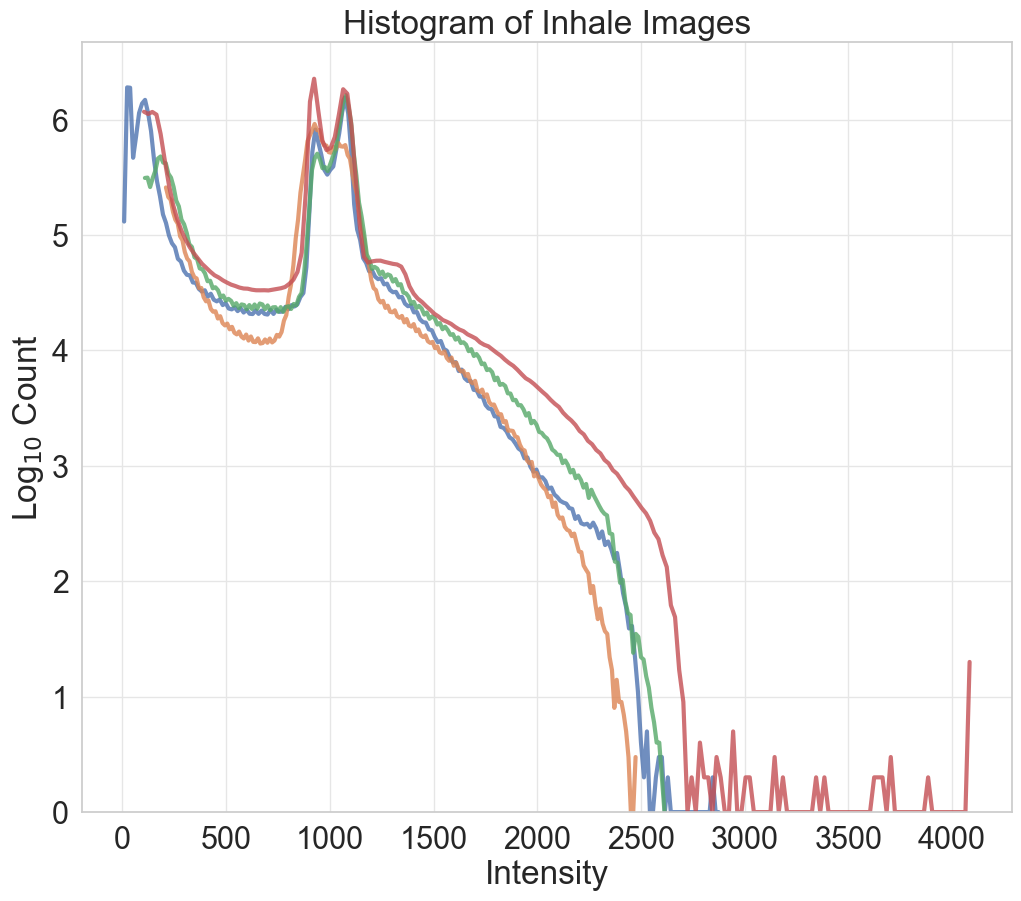

In [11]:
visualize_histograms(inhale_images, title="Histogram of Inhale Images")

## Basic Registration

In [2]:
# register the images
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
                                                        moving_mask_path=None, parameter_files=None, patient_num=patient_num, param='default_affine', mask=False, suffix='default_affine')

TRE mean: 25.60044087599149 mm, std: 11.223521554358829 mm
Computation time: 22.35 seconds
TRE mean: 22.279292303991927 mm, std: 6.0166582010518415 mm
Computation time: 19.61 seconds
TRE mean: 7.582985924802297 mm, std: 3.364848818504824 mm
Computation time: 23.25 seconds
TRE mean: 26.089304512974877 mm, std: 10.170072532051682 mm
Computation time: 24.25 seconds


In [3]:
# register the images
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
                                                        moving_mask_path=None, parameter_files=None, patient_num=patient_num, param='default_bspline', mask=False, suffix='default_bspline')

TRE mean: 23.71210676172916 mm, std: 11.343814181961944 mm
Computation time: 118.19 seconds
TRE mean: 18.81631797154766 mm, std: 6.875686614007993 mm
Computation time: 103.78 seconds
TRE mean: 10.497418943405728 mm, std: 5.606736289098332 mm
Computation time: 131.03 seconds
TRE mean: 28.06924452966699 mm, std: 12.725905434997813 mm
Computation time: 121.18 seconds


In [ ]:
# # register the images
# for patient_num in range(1, 5):
#     fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
#     moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
#     fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
#     moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
#     parameter_files = multi_parameter_list(["parameters/3/Par0003.affine.txt"])
#     registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
#                                                         moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='3_affine')

In [ ]:
# # register the images
# for patient_num in range(1, 5):
#     fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
#     moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
#     fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
#     moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
#     parameter_files = multi_parameter_list(["parameters/3/Par0003.bs-R5-ug.txt"])
#     registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
#                                                         moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='3_bspline')

In [ ]:
# # register the images
# for patient_num in range(1, 5):
#     fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
#     moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
#     fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
#     moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
#     parameter_files = multi_parameter_list(["parameters/4/Par0004.bs_base.NRP08.All.txt"])
#     registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
#                                                         moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='4_bspline')

In [ ]:
# # register the images
# for patient_num in range(1, 5):
#     fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
#     moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
#     fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
#     moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
#     parameter_files = multi_parameter_list(["parameters/8/Parameters.Par0008.affine.txt"])
#     registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
#                                                         moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='8_affine')

In [ ]:
# # register the images
# for patient_num in range(1, 5):
#     fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
#     moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
#     fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
#     moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
#     parameter_files = multi_parameter_list(["parameters/8/Parameters.Par0008.elastic.txt"])
#     registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
#                                                         moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='8_elastic')

In [4]:
# register the images
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/11/Parameters.Par0011.affine.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
                                                        moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='11_affine')

TRE mean: 25.14569652885122 mm, std: 10.196512796283134 mm
Computation time: 28.88 seconds
TRE mean: 25.869414649793264 mm, std: 5.324599700772811 mm
Computation time: 25.04 seconds
TRE mean: 7.456656254943282 mm, std: 3.3424971369600884 mm
Computation time: 30.26 seconds
TRE mean: 22.919132547429307 mm, std: 8.494823779786827 mm
Computation time: 30.74 seconds


In [3]:
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/11/Parameters.Par0011.bspline1_s.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
                                                        moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='11_bspline1_s')

TRE mean: 8.229318405600676 mm, std: 5.588846754228771 mm
Computation time: 103.52 seconds
TRE mean: 14.385832461708818 mm, std: 6.895542979153859 mm
Computation time: 96.65 seconds
TRE mean: 5.016314338441179 mm, std: 3.145350086032746 mm
Computation time: 130.73 seconds
TRE mean: 8.614627894031543 mm, std: 4.165698773311432 mm
Computation time: 112.93 seconds


In [ ]:
# for patient_num in range(1, 5):
#     fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
#     moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
#     fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
#     moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
#     parameter_files = multi_parameter_list(["parameters/15/Parameters.Par0015.expC.phantom.NC.affine.txt"])
#     registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
#                                                         moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='15_affine')

In [13]:
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/mod/mod1.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
                                                        moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='mod1')

TRE mean: 6.5532101131018585 mm, std: 5.280586494884868 mm
Computation time: 94.27 seconds
TRE mean: 13.100909347519513 mm, std: 7.423409826179916 mm
Computation time: 104.38 seconds
TRE mean: 4.54581866514905 mm, std: 3.6024728476572614 mm
Computation time: 95.96 seconds
TRE mean: 8.24386308687146 mm, std: 4.68807723232196 mm
Computation time: 91.58 seconds


In [14]:
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/mod/mod2.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
                                                        moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='mod2')

TRE mean: 6.108235837068658 mm, std: 5.127985560640723 mm
Computation time: 94.38 seconds
TRE mean: 10.918317902954565 mm, std: 6.802048879412019 mm
Computation time: 82.84 seconds
TRE mean: 4.244582113916801 mm, std: 3.465591234100714 mm
Computation time: 101.74 seconds
TRE mean: 8.837966446793102 mm, std: 5.271677014606847 mm
Computation time: 96.65 seconds


In [15]:
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/mod/mod3.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
                                                        moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='mod3')

TRE mean: 6.436510298932271 mm, std: 5.426862021949802 mm
Computation time: 96.75 seconds
TRE mean: 11.307946092896412 mm, std: 6.569697808487801 mm
Computation time: 84.52 seconds
TRE mean: 4.940244643969663 mm, std: 3.7077993374533187 mm
Computation time: 106.69 seconds
TRE mean: 10.071564775111847 mm, std: 5.390846116127592 mm
Computation time: 104.81 seconds


In [19]:
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/mod/mod4.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
                                                        moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='mod4')

TRE mean: 4.466609760748808 mm, std: 4.784457733157555 mm
Computation time: 236.49 seconds
TRE mean: 7.899828665005376 mm, std: 6.733779236441162 mm
Computation time: 276.09 seconds
TRE mean: 3.0099453781160475 mm, std: 3.057179658971849 mm
Computation time: 269.07 seconds
TRE mean: 11.165773362597156 mm, std: 7.539678318164898 mm
Computation time: 242.39 seconds


In [4]:
# for patient_num in range(1, 5):
#     fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
#     moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
#     fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
#     moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
#     parameter_files = multi_parameter_list(["parameters/mod/param.txt"])
#     registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_mask_path=None, 
#                                                         moving_mask_path=None, parameter_files=parameter_files, patient_num=patient_num, mask=False, suffix='mod')

TRE mean: 5.092439695967229 mm, std: 4.962250088426116 mm
Computation time: 218.72 seconds
TRE mean: 6.772936442307155 mm, std: 6.147931262272139 mm
Computation time: 205.41 seconds
TRE mean: 3.16411098231363 mm, std: 3.3335835696729266 mm
Computation time: 223.09 seconds
TRE mean: 12.342261357404116 mm, std: 7.622581447751948 mm
Computation time: 220.80 seconds


## Advanced Registration

In [8]:
for patient_num in range(1,5):
    for phase in ['i', 'e']:
        im = f"data/copd{patient_num}/copd{patient_num}_{phase}BHCT.nii.gz"
        im = sitk.ReadImage(im)
        im = sitk.GetArrayFromImage(im) - 1024
        
        model = mask.get_model('R231CovidWeb')
        segmentation = mask.apply(im, model)
        segmentation[segmentation == 2] = 1
        
        file_name = str(f"data/copd{patient_num}/copd{patient_num}_{phase}BHCT_lungmask.nrrd")
        save_as_nifti(segmentation, file_name, f"data/copd{patient_num}/copd{patient_num}_{phase}BHCT.nii.gz")

lungmask 2024-12-02 15:07:50 No GPU found, using CPU instead


7it [00:40,  5.82s/it]                          

lungmask 2024-12-02 15:08:32 Postprocessing



100%|██████████| 2/2 [00:00<00:00, 666.61it/s]


lungmask 2024-12-02 15:08:35 No GPU found, using CPU instead


7it [00:40,  5.78s/it]                          

lungmask 2024-12-02 15:09:16 Postprocessing



100%|██████████| 2/2 [00:00<00:00, 666.24it/s]


lungmask 2024-12-02 15:09:19 No GPU found, using CPU instead


6it [00:34,  5.74s/it]                         

lungmask 2024-12-02 15:09:54 Postprocessing



100%|██████████| 3/3 [00:00<00:00, 2284.89it/s]


lungmask 2024-12-02 15:09:57 No GPU found, using CPU instead


6it [00:34,  5.81s/it]                         

lungmask 2024-12-02 15:10:33 Postprocessing



100%|██████████| 2/2 [00:00<00:00, 999.48it/s]


lungmask 2024-12-02 15:10:35 No GPU found, using CPU instead


7it [00:43,  6.24s/it]                         

lungmask 2024-12-02 15:11:20 Postprocessing



100%|██████████| 2/2 [00:00<00:00, 666.87it/s]


lungmask 2024-12-02 15:11:23 No GPU found, using CPU instead


7it [00:43,  6.16s/it]                         

lungmask 2024-12-02 15:12:07 Postprocessing



100%|██████████| 2/2 [00:00<00:00, 666.40it/s]


lungmask 2024-12-02 15:12:10 No GPU found, using CPU instead


7it [00:42,  6.02s/it]                         

lungmask 2024-12-02 15:12:54 Postprocessing



100%|██████████| 2/2 [00:00<00:00, 1320.00it/s]


lungmask 2024-12-02 15:12:57 No GPU found, using CPU instead


7it [00:41,  5.92s/it]                         

lungmask 2024-12-02 15:13:39 Postprocessing



100%|██████████| 2/2 [00:00<00:00, 1000.19it/s]


In [6]:
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    fixed_label = f"data/copd{patient_num}/copd{patient_num}_iBHCT_lungmask.nrrd"
    moving_label = f"data/copd{patient_num}/copd{patient_num}_eBHCT_lungmask.nrrd"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/11/Parameters.Par0011.bspline1_s.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_label, 
                                                        moving_label, parameter_files, patient_num=patient_num, mask=True, suffix='11_bspline1_s')

TRE mean: 3.770433672748697 mm, std: 4.595586610887339 mm
Computation time: 93.82 seconds
TRE mean: 4.258957737265417 mm, std: 5.36302000639022 mm
Computation time: 83.98 seconds
TRE mean: 1.4723456021427743 mm, std: 1.0224229324758223 mm
Computation time: 107.06 seconds
TRE mean: 2.096115255291597 mm, std: 1.727508324533568 mm
Computation time: 93.08 seconds


In [20]:
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    fixed_label = f"data/copd{patient_num}/copd{patient_num}_iBHCT_lungmask.nrrd"
    moving_label = f"data/copd{patient_num}/copd{patient_num}_eBHCT_lungmask.nrrd"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/mod/mod4.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_label, 
                                                        moving_label, parameter_files, patient_num=patient_num, mask=True, suffix='mod4')

TRE mean: 1.1416741655205105 mm, std: 0.7401308801327953 mm
Computation time: 326.13 seconds
TRE mean: 2.1138705840157868 mm, std: 2.832323020934714 mm
Computation time: 350.70 seconds
TRE mean: 1.1565819228439573 mm, std: 0.7477391482609074 mm
Computation time: 380.70 seconds
TRE mean: 1.3512980881145051 mm, std: 0.7462058354512213 mm
Computation time: 349.42 seconds


# Improvements (preprocessing)

### Intensity normalization

In [12]:
# intensity normalization
for patient_num in range(1, 5):
    inhale_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    inhale_image,_,_ = read_nifti_file(inhale_image)
    exhale_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    exhale_image,_,_ = read_nifti_file(exhale_image)
    
    # normalize the intensity
    inhale_image = (inhale_image - inhale_image.min()) / (inhale_image.max() - inhale_image.min())
    exhale_image = (exhale_image - exhale_image.min()) / (exhale_image.max() - exhale_image.min())
    
    # save the normalized images
    save_as_nifti(inhale_image, f"data/copd{patient_num}/copd{patient_num}_iBHCT_normalized.nii.gz", f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz")
    save_as_nifti(exhale_image, f"data/copd{patient_num}/copd{patient_num}_eBHCT_normalized.nii.gz", f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz")

In [13]:
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT_normalized.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT_normalized.nii.gz"
    fixed_label = f"data/copd{patient_num}/copd{patient_num}_iBHCT_lungmask.nrrd"
    moving_label = f"data/copd{patient_num}/copd{patient_num}_eBHCT_lungmask.nrrd"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/mod/mod4.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_label, 
                                                        moving_label, parameter_files, patient_num=patient_num, mask=True, suffix='mod4_normalized')

TRE mean: 1.1472344258549951 mm, std: 0.7509765463655687 mm
Computation time: 241.78 seconds
TRE mean: 2.0835480291006627 mm, std: 2.8057347052629766 mm
Computation time: 242.69 seconds
TRE mean: 1.1618983705723755 mm, std: 0.7759949997623307 mm
Computation time: 263.30 seconds
TRE mean: 1.3516289636029206 mm, std: 0.746631814480526 mm
Computation time: 285.56 seconds


### Contrasct enhancement

In [17]:
# contrast enhancement
for patient_num in range(1, 5):
    inhale_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    inhale_image,_,_ = read_nifti_file(inhale_image)
    inhale_image = sitk.GetImageFromArray(inhale_image)
    exhale_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    exhale_image,_,_ = read_nifti_file(exhale_image)
    exhale_image = sitk.GetImageFromArray(exhale_image)
    
    # contrast enhancement
    inhale_image = sitk.AdaptiveHistogramEqualization(inhale_image)
    exhale_image = sitk.AdaptiveHistogramEqualization(exhale_image)
    
    inhale_image = sitk.GetArrayFromImage(inhale_image)
    exhale_image = sitk.GetArrayFromImage(exhale_image)
    
    
    # save the contrast enhanced images
    save_as_nifti(inhale_image, f"data/copd{patient_num}/copd{patient_num}_iBHCT_contrast.nii.gz", f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz")
    save_as_nifti(exhale_image, f"data/copd{patient_num}/copd{patient_num}_eBHCT_contrast.nii.gz", f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz")

In [19]:
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT_contrast.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT_contrast.nii.gz"
    fixed_label = f"data/copd{patient_num}/copd{patient_num}_iBHCT_lungmask.nrrd"
    moving_label = f"data/copd{patient_num}/copd{patient_num}_eBHCT_lungmask.nrrd"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/mod/mod4.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_label, 
                                                        moving_label, parameter_files, patient_num=patient_num, mask=True, suffix='mod4_contrast')

TRE mean: 1.1021399431704382 mm, std: 0.6007220547055341 mm
Computation time: 239.30 seconds
TRE mean: 3.032748606274675 mm, std: 4.9097403659350345 mm
Computation time: 244.17 seconds
TRE mean: 1.1005591384866886 mm, std: 0.617234364609239 mm
Computation time: 262.68 seconds
TRE mean: 1.3440945965571982 mm, std: 1.0573799564189488 mm
Computation time: 250.53 seconds


### Intensity normalization + Contrasct enhancement

In [20]:
# intensity normalization and contrast enhancement
for patient_num in range(1, 5):
    inhale_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT_normalized.nii.gz"
    inhale_image,_,_ = read_nifti_file(inhale_image)
    inhale_image = sitk.GetImageFromArray(inhale_image)
    exhale_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT_normalized.nii.gz"
    exhale_image,_,_ = read_nifti_file(exhale_image)
    exhale_image = sitk.GetImageFromArray(exhale_image)
    
    # contrast enhancement
    inhale_image = sitk.AdaptiveHistogramEqualization(inhale_image)
    exhale_image = sitk.AdaptiveHistogramEqualization(exhale_image)
    
    inhale_image = sitk.GetArrayFromImage(inhale_image)
    exhale_image = sitk.GetArrayFromImage(exhale_image)
    
    # save the normalized images
    save_as_nifti(inhale_image, f"data/copd{patient_num}/copd{patient_num}_iBHCT_normalized_contrast.nii.gz", f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz")
    save_as_nifti(exhale_image, f"data/copd{patient_num}/copd{patient_num}_eBHCT_normalized_contrast.nii.gz", f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz")

In [21]:
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT_normalized_contrast.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT_normalized_contrast.nii.gz"
    fixed_label = f"data/copd{patient_num}/copd{patient_num}_iBHCT_lungmask.nrrd"
    moving_label = f"data/copd{patient_num}/copd{patient_num}_eBHCT_lungmask.nrrd"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/mod/mod4.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_label, 
                                                        moving_label, parameter_files, patient_num=patient_num, mask=True, suffix='mod4_normalized_contrast')

TRE mean: 1.1014939530413124 mm, std: 0.5978958705230094 mm
Computation time: 243.21 seconds
TRE mean: 2.9936674997045998 mm, std: 4.856553039269691 mm
Computation time: 248.67 seconds
TRE mean: 1.1018737801131129 mm, std: 0.6283376689761594 mm
Computation time: 261.94 seconds
TRE mean: 1.34165548667702 mm, std: 1.0224325066184456 mm
Computation time: 254.00 seconds


### Denoising

In [22]:
# denoising
for patient_num in range(1, 5):
    inhale_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    inhale_image,_,_ = read_nifti_file(inhale_image)
    inhale_image = sitk.GetImageFromArray(inhale_image)
    exhale_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    exhale_image,_,_ = read_nifti_file(exhale_image)
    exhale_image = sitk.GetImageFromArray(exhale_image)
    
    # denoising
    inhale_image = sitk.CurvatureFlow(image1=inhale_image, timeStep=0.125, numberOfIterations=5)
    exhale_image = sitk.CurvatureFlow(image1=exhale_image, timeStep=0.125, numberOfIterations=5)
    
    inhale_image = sitk.GetArrayFromImage(inhale_image)
    exhale_image = sitk.GetArrayFromImage(exhale_image)
    
    # save the denoised images
    save_as_nifti(inhale_image, f"data/copd{patient_num}/copd{patient_num}_iBHCT_denoised.nii.gz", f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz")
    save_as_nifti(exhale_image, f"data/copd{patient_num}/copd{patient_num}_eBHCT_denoised.nii.gz", f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz")

In [23]:
for patient_num in range(1, 5):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT_denoised.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT_denoised.nii.gz"
    fixed_label = f"data/copd{patient_num}/copd{patient_num}_iBHCT_lungmask.nrrd"
    moving_label = f"data/copd{patient_num}/copd{patient_num}_eBHCT_lungmask.nrrd"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/mod/mod4.txt"])
    registered_image, transformed_points = register_images(fixed_image, moving_image, fixed_landmarks, moving_landmarks, fixed_label, 
                                                        moving_label, parameter_files, patient_num=patient_num, mask=True, suffix='mod4_denosied')

TRE mean: 1.4583612749376706 mm, std: 1.2644031470454895 mm
Computation time: 241.82 seconds
TRE mean: 2.9323197090686253 mm, std: 3.462084344457079 mm
Computation time: 253.88 seconds
TRE mean: 1.3339207479207686 mm, std: 0.9482801246409341 mm
Computation time: 261.62 seconds
TRE mean: 2.873126936888301 mm, std: 4.1477471065433695 mm
Computation time: 250.66 seconds


# Result Analysis

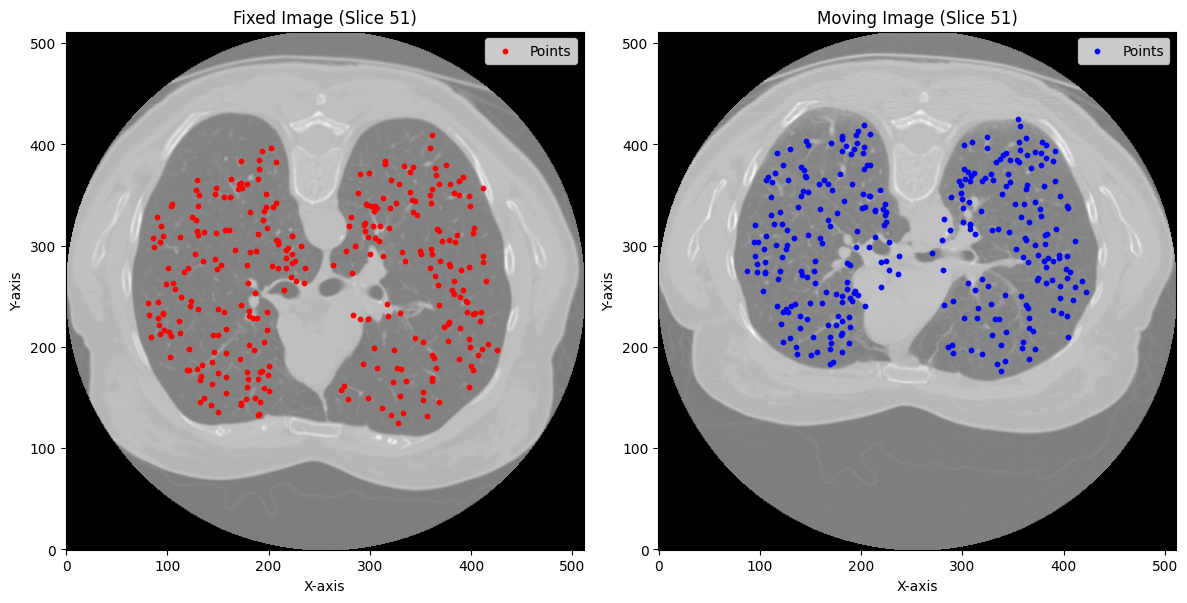

In [2]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Load the image file
for patient_num in range(1, 2):
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    moving_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_eBH_xyz_r1.pts"
    
    fixed_image_data = nib.load(fixed_image).get_fdata()
    moving_image_data = nib.load(moving_image).get_fdata()
    with open(fixed_landmarks, 'r') as f:
        fixed_points = np.loadtxt(f, skiprows=2)
    with open(moving_landmarks, 'r') as f:
        moving_points = np.loadtxt(f, skiprows=2)


# Extract the coordinates
x_f = fixed_points[:, 0]
y_f = fixed_points[:, 1]
z_f = fixed_points[:, 2]

x_m = moving_points[:, 0]
y_m = moving_points[:, 1]
z_m = moving_points[:, 2]

# Select a slice to visualize (using the mean Z-coordinate)
slice_idx = int(np.mean(z_m))

# Plot the fixed and moving image slices
plt.figure(figsize=(12, 6))

# Plot fixed image
plt.subplot(1, 2, 1)
plt.imshow(fixed_image_data[:, :, slice_idx].T, cmap='gray', origin='lower')
plt.scatter(x_f, y_f, c='red', s=10, label='Points')
plt.title(f'Fixed Image (Slice {slice_idx})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Plot moving image
plt.subplot(1, 2, 2)
plt.imshow(moving_image_data[:, :, slice_idx].T, cmap='gray', origin='lower')
plt.scatter(x_m, y_m, c='blue', s=10, label='Points')
plt.title(f'Moving Image (Slice {slice_idx})')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

plt.tight_layout()
plt.show()


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

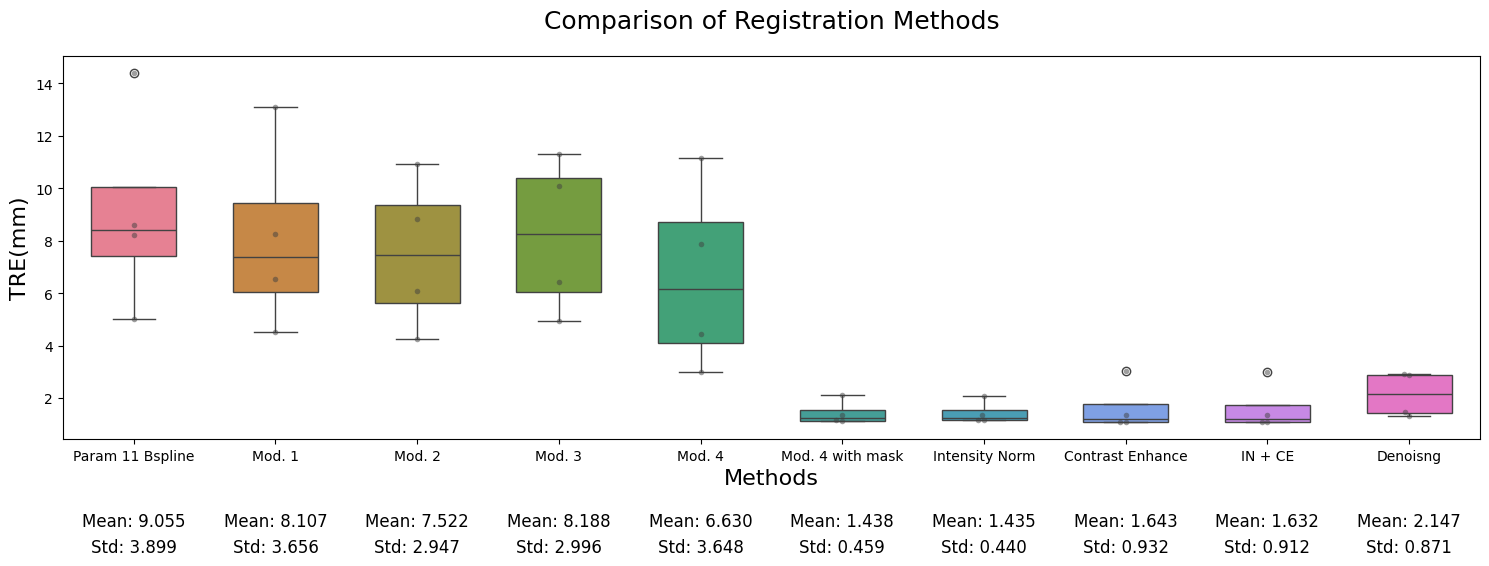

In [51]:
tre_values_param11  = [8.22,14.38,5.01,8.61,]
tre_values_mod1 = [6.55,13.10,4.54,8.24,]
tre_values_mod2 = [6.10,10.92,4.24,8.83,]
tre_values_mod3 = [6.43,11.31,4.94,10.07,]
tre_values_mod4 = [4.46,7.89,3.01,11.16,]
tre_values_mod4_with_mask = [1.14,2.11,1.15,1.35,]
tre_values_mod4_with_mask_plus_IN = [1.15,2.08,1.16,1.35,]
tre_values_mod4_with_mask_plus_CE = [1.10,3.03,1.10,1.34,]
tre_values_mod4_with_mask_plus_IN_CE = [1.10,2.99,1.10,1.34,]
tre_values_mod4_with_mask_plus_DE = [1.46,2.93,1.33,2.87,]
data = {
    'Param 11 Bspline': tre_values_param11,
    'Mod. 1': tre_values_mod1,
    'Mod. 2': tre_values_mod2,
    'Mod. 3': tre_values_mod3,
    'Mod. 4': tre_values_mod4,
    'Mod. 4 with mask': tre_values_mod4_with_mask,
    'Intensity Norm': tre_values_mod4_with_mask_plus_IN,
    'Contrast Enhance': tre_values_mod4_with_mask_plus_CE,
    'IN + CE': tre_values_mod4_with_mask_plus_IN_CE,
    'Denoisng': tre_values_mod4_with_mask_plus_DE,

}
df = pd.DataFrame(data)
sns.set_palette("husl")
plt.figure(figsize=(15, 6))
box_plot = sns.boxplot(data=df, width=0.6)
sns.swarmplot(data=df, color=".25", size=4, alpha=0.5)
plt.title('Comparison of Registration Methods', pad=20, size=18)
plt.ylabel('TRE(mm)', size=16)
plt.xlabel('Methods', size=16)
# Add mean values as text
for i, method in enumerate(df.columns):
    mean_val = df[method].mean()
    plt.text(i, plt.ylim()[0] - 3.3, f'Mean: {mean_val:.3f}', 
             horizontalalignment='center', size=12)
# add standard deviation as text
for i, method in enumerate(df.columns):
    std_val = df[method].std()
    plt.text(i, plt.ylim()[0] - 4.3, f'Std: {std_val:.3f}', 
             horizontalalignment='center', size=12)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

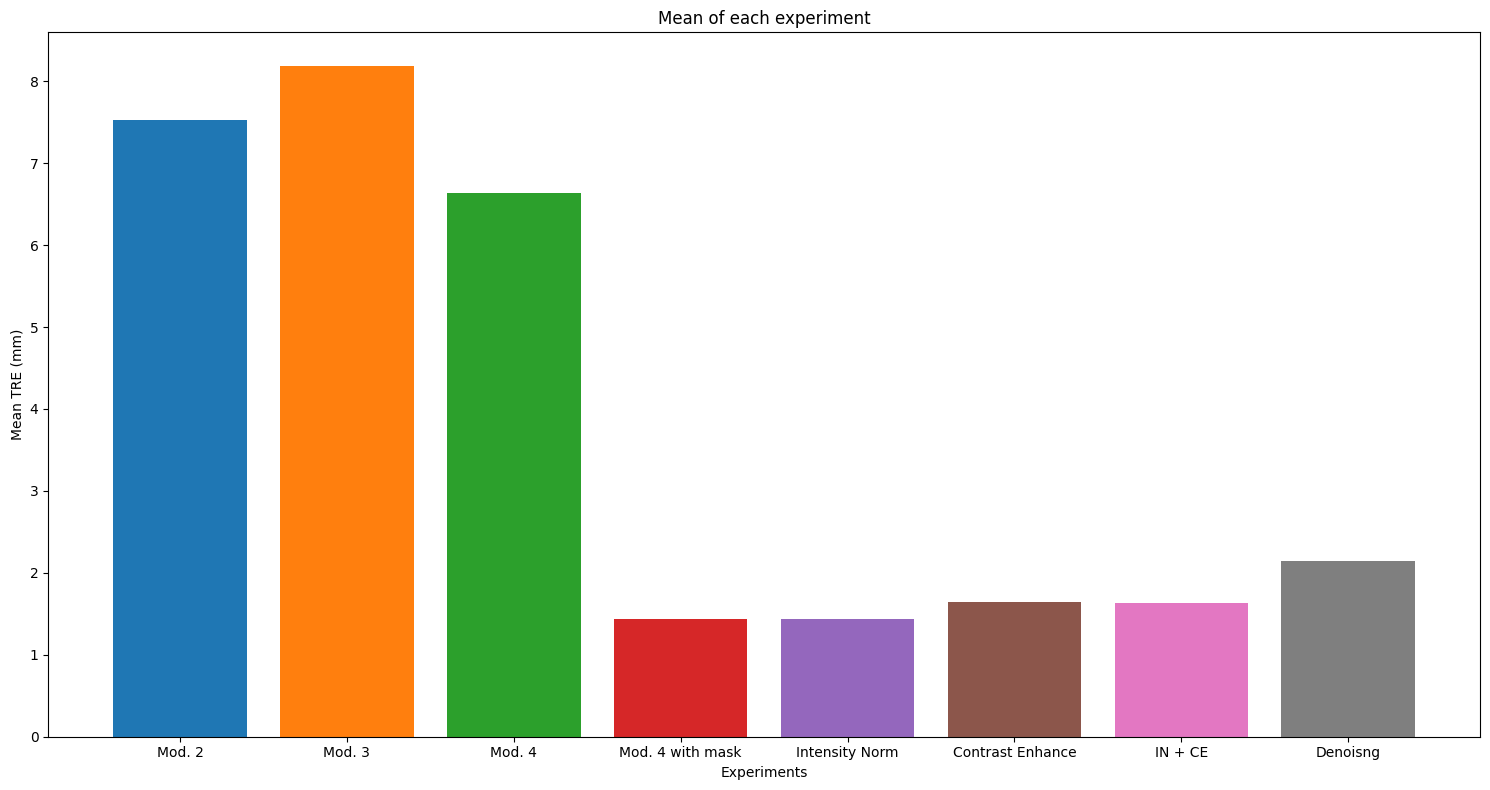

In [33]:

import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt

tre_values_mod2 = [6.10, 10.92, 4.24, 8.83]
tre_values_mod3 = [6.43, 11.31, 4.94, 10.07]
tre_values_mod4 = [4.46, 7.89, 3.01, 11.16]
tre_values_mod4_with_mask = [1.14, 2.11, 1.15, 1.35]
tre_values_mod4_with_mask_plus_IN = [1.15, 2.08, 1.16, 1.35]
tre_values_mod4_with_mask_plus_CE = [1.10, 3.03, 1.10, 1.34]
tre_values_mod4_with_mask_plus_IN_CE = [1.10, 2.99, 1.10, 1.34]
tre_values_mod4_with_mask_plus_DE = [1.46, 2.93, 1.33, 2.87]

data = {
    'Mod. 2': np.mean(tre_values_mod2),
    'Mod. 3': np.mean(tre_values_mod3),
    'Mod. 4': np.mean(tre_values_mod4),
    'Mod. 4 with mask': np.mean(tre_values_mod4_with_mask),
    'Intensity Norm': np.mean(tre_values_mod4_with_mask_plus_IN),
    'Contrast Enhance': np.mean(tre_values_mod4_with_mask_plus_CE),
    'IN + CE': np.mean(tre_values_mod4_with_mask_plus_IN_CE),
    'Denoisng': np.mean(tre_values_mod4_with_mask_plus_DE),
}



# Create figure for 2D bar plot
fig, ax = plt.subplots(figsize=(15, 8))

# Define colors for each bar
colors = list(mcolors.TABLEAU_COLORS.values())  # Use Tableau colors

# Create bars with different colors
bars = ax.bar(data.keys(), list(data.values()), color=colors, alpha=1)

# Labels and Title
ax.set_xlabel('Experiments')
ax.set_ylabel('Mean TRE (mm)')
ax.set_title('Mean of each experiment')

# Add legend using the bar handles
# ax.legend(bars, data.keys(), title="Experiments", loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()

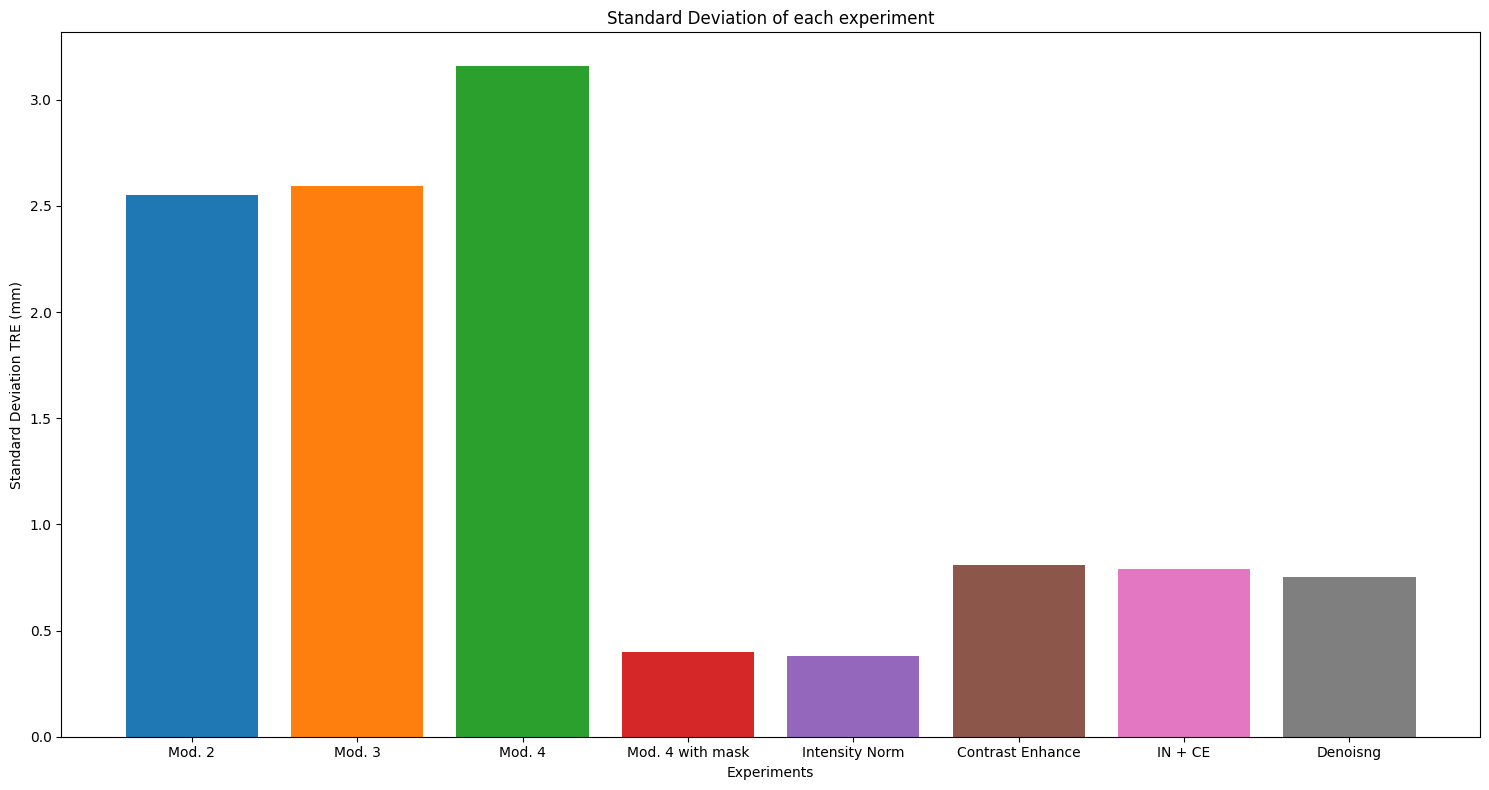

In [37]:

import matplotlib.colors as mcolors
import numpy as np
import matplotlib.pyplot as plt

tre_values_mod2 = [6.10, 10.92, 4.24, 8.83]
tre_values_mod3 = [6.43, 11.31, 4.94, 10.07]
tre_values_mod4 = [4.46, 7.89, 3.01, 11.16]
tre_values_mod4_with_mask = [1.14, 2.11, 1.15, 1.35]
tre_values_mod4_with_mask_plus_IN = [1.15, 2.08, 1.16, 1.35]
tre_values_mod4_with_mask_plus_CE = [1.10, 3.03, 1.10, 1.34]
tre_values_mod4_with_mask_plus_IN_CE = [1.10, 2.99, 1.10, 1.34]
tre_values_mod4_with_mask_plus_DE = [1.46, 2.93, 1.33, 2.87]

data = {
    'Mod. 2': np.std(tre_values_mod2),
    'Mod. 3': np.std(tre_values_mod3),
    'Mod. 4': np.std(tre_values_mod4),
    'Mod. 4 with mask': np.std(tre_values_mod4_with_mask),
    'Intensity Norm': np.std(tre_values_mod4_with_mask_plus_IN),
    'Contrast Enhance': np.std(tre_values_mod4_with_mask_plus_CE),
    'IN + CE': np.std(tre_values_mod4_with_mask_plus_IN_CE),
    'Denoisng': np.std(tre_values_mod4_with_mask_plus_DE),
}



# Create figure for 2D bar plot
fig, ax = plt.subplots(figsize=(15, 8))

# Define colors for each bar
colors = list(mcolors.TABLEAU_COLORS.values())  # Use Tableau colors

# Create bars with different colors
bars = ax.bar(data.keys(), list(data.values()), color=colors, alpha=1)

# Labels and Title
ax.set_xlabel('Experiments')
ax.set_ylabel('Standard Deviation TRE (mm)')
ax.set_title('Standard Deviation of each experiment')

# Add legend using the bar handles
# ax.legend(bars, data.keys(), title="Experiments", loc='upper left', bbox_to_anchor=(1, 1))

# Show plot
plt.tight_layout()
plt.show()

# Challenge Day

In [ ]:
for patient_num in [8,9,12]:
    for phase in ['i', 'e']:       
        convert_txt_to_pts_with_header(f"data/copd{patient_num}/copd{patient_num}_300_{phase}BH_xyz_r1.txt")

In [ ]:
for patient_num in [8,9,12]:
    for phase in ['i', 'e']:
        im = f"data/copd{patient_num}/copd{patient_num}_{phase}BHCT.nii.gz"
        im = sitk.ReadImage(im)
        im = sitk.GetArrayFromImage(im) - 1024
        
        model = mask.get_model('R231CovidWeb')
        segmentation = mask.apply(im, model)
        segmentation[segmentation == 2] = 1
        
        file_name = str(f"data/copd{patient_num}/copd{patient_num}_{phase}BHCT_lungmask.nrrd")
        save_as_nifti(segmentation, file_name, f"data/copd{patient_num}/copd{patient_num}_{phase}BHCT.nii.gz")

In [ ]:
# intensity normalization
for patient_num in [8,9,12]:
    inhale_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz"
    inhale_image,_,_ = read_nifti_file(inhale_image)
    exhale_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz"
    exhale_image,_,_ = read_nifti_file(exhale_image)
    
    # normalize the intensity
    inhale_image = (inhale_image - inhale_image.min()) / (inhale_image.max() - inhale_image.min())
    exhale_image = (exhale_image - exhale_image.min()) / (exhale_image.max() - exhale_image.min())
    
    # save the normalized images
    save_as_nifti(inhale_image, f"data/copd{patient_num}/copd{patient_num}_iBHCT_normalized.nii.gz", f"data/copd{patient_num}/copd{patient_num}_iBHCT.nii.gz")
    save_as_nifti(exhale_image, f"data/copd{patient_num}/copd{patient_num}_eBHCT_normalized.nii.gz", f"data/copd{patient_num}/copd{patient_num}_eBHCT.nii.gz")

In [ ]:
for patient_num in [8,9,12]:
    fixed_image = f"data/copd{patient_num}/copd{patient_num}_iBHCT_normalized.nii.gz"
    moving_image = f"data/copd{patient_num}/copd{patient_num}_eBHCT_normalized.nii.gz"
    fixed_label = f"data/copd{patient_num}/copd{patient_num}_iBHCT_lungmask.nrrd"
    moving_label = f"data/copd{patient_num}/copd{patient_num}_eBHCT_lungmask.nrrd"
    fixed_landmarks = f"data/copd{patient_num}/copd{patient_num}_300_iBH_xyz_r1.pts"
    parameter_files = multi_parameter_list(["parameters/mod/mod4.txt"]) 
    registered_image, transformed_points = register_test_images(fixed_image, moving_image, fixed_landmarks, fixed_label, 
                                                        moving_label, parameter_files, patient_num=patient_num, mask=True, suffix='mod4_normalized')